In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('full_8classes_f_stemmer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 3].values

In [3]:
import matplotlib.pyplot as plt

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

In [4]:
# fix empty values
for i in range(len(X[:, 0])):
    if type(X[i, 0]) is not str:
        X[i, 0] = ''
for i in range(len(X[:, 1])):
    if type(X[i, 1]) is not str:
        X[i, 1] = ''

In [5]:
# one against all
# d against all
for i in range(len(y)):
    y[i] = 1 if y[i] == 3 else 0 # D        

In [6]:
# Stratified 10-fold cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [7]:
# split strafified kfold
skf = StratifiedKFold(n_splits=10, shuffle=True)
splits = skf.split(X, y)

In [8]:
# import oversamplig
from imblearn.over_sampling import RandomOverSampler

X_train size: 318943
X_test size: 35439
building tree 1 of 100building tree 3 of 100building tree 2 of 100
building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 22.5min finished
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


Confusion matrix, without normalization
[[34643    17]
 [  681    98]]


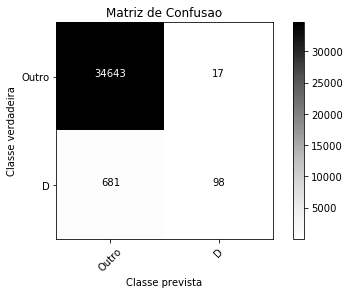

NameError: name 'accuracies' is not defined

In [9]:
for train_index, test_index in splits:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('X_train size: ' + str(len(X_train)))
    print('X_test size: ' + str(len(X_test)))
    
    # Vectorize titles and summary separately
    
    title_cv = CountVectorizer(max_features = None, ngram_range=(1,1))
    X_title = title_cv.fit_transform(X_train[:, 0])
    summary_cv = CountVectorizer(max_features = None, ngram_range=(1,1))
    X_summary = summary_cv.fit_transform(X_train[:, 1])
    
    # Apply SVD transformation n_components=20 and 100 separately
    svd_title = TruncatedSVD(n_components=100)
    X_title = svd_title.fit_transform(X_title)
    svd_summary = TruncatedSVD(n_components=400)
    X_summary = svd_summary.fit_transform(X_summary)
    
    # Concatenate title and summary svd representation
    X_train = np.concatenate((X_title, X_summary), axis=1)
    
    # resampling
    #ros = RandomOverSampler(random_state=None)
    #X_train, y_train = ros.fit_sample(X_train, y_train)
    #print('Resampled X_train size: '+str(len(X_train)))

    
    # train the model
    classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', n_jobs=-1, verbose=2)
    classifier.fit(X_train, y_train)
    
    # Vectorize titles and summary separately
    X_title = title_cv.transform(X_test[:, 0])
    X_summary = summary_cv.transform(X_test[:, 1])
    
    # Apply SVD transformation n_components=20 and 100 separately
    X_title = svd_title.transform(X_title)
    X_summary = svd_summary.transform(X_summary)
    
    # Concatenate title and summary svd representation
    X_test = np.concatenate((X_title, X_summary), axis=1)
    
    # predict test set
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    #class_names = ['A','B','C','D','E','F','G','H']
    class_names = ['Outro','D']
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, title='Matriz de Confusao')
    plt.show()
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print('Acuracia: ' + str(acc))
    
    #ps = [[], [], [], [], [], [], [], []]
    #for i in range(8):
    #    #ps[i] = accuracy_score(y_test[:,i], y_pred[:,i])
    #    ps[i] = cm[i, i] / np.array(cm[i, :]).sum()
    #    precisions.append(ps[i])
    #    print('Acuracia '+chr(i + 65)+': ' + str(ps[i]))
        
    print('\n')
    break